In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sqlite3
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [113]:
customers = pd.read_csv('customer.txt', sep='\t', encoding='latin1');
customers.info()
customers.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189559 entries, 0 to 189558
Data columns (total 4 columns):
customerid     189559 non-null int64
householdid    189559 non-null int64
gender         173355 non-null object
firstname      186644 non-null object
dtypes: int64(2), object(2)
memory usage: 5.8+ MB


,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [114]:
orderlines = pd.read_csv('orderline.txt', sep='\t', encoding='latin1');
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286017 entries, 0 to 286016
Data columns (total 8 columns):
orderlineid    286017 non-null int64
orderid        286017 non-null int64
productid      286017 non-null int64
shipdate       286017 non-null object
billdate       286017 non-null object
unitprice      281033 non-null float64
numunits       286017 non-null int64
totalprice     286017 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.5+ MB


In [115]:
products = pd.read_csv('product.txt', sep='\t', encoding='latin1');
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 6 columns):
PRODUCTID           4040 non-null int64
PRODUCTNAME         0 non-null float64
PRODUCTGROUPCODE    4040 non-null object
PRODUCTGROUPNAME    4039 non-null object
INSTOCKFLAG         4040 non-null object
FULLPRICE           4040 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 189.5+ KB


,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [116]:
campaign  = pd.read_csv('campaign.txt', sep='\t', encoding='latin1');
campaign.info()
campaign.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
campaignid          239 non-null int64
campaignname        0 non-null float64
channel             239 non-null object
discount            239 non-null int64
freeshippingflag    239 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 9.4+ KB


,campaignid,campaignname,channel,discount,freeshippingflag
0,2001,NaN,PARTNER,0,N
1,2002,NaN,AD,0,N
2,2003,NaN,PARTNER,0,N
3,2004,NaN,PARTNER,0,N
4,2005,NaN,PARTNER,0,N


In [117]:
orders = pd.read_csv('orders.txt', sep='\t', encoding='latin1');
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192983 entries, 0 to 192982
Data columns (total 11 columns):
orderid          192983 non-null int64
customerid       192983 non-null int64
campaignid       192983 non-null int64
orderdate        192983 non-null object
city             192964 non-null object
state            191864 non-null object
zipcode          192837 non-null object
paymenttype      192983 non-null object
totalprice       192983 non-null float64
numorderlines    192983 non-null int64
numunits         192983 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 16.2+ MB


,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3
1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2
3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1


In [118]:
ordersCustomer = orders.merge(customers, on='customerid')

In [119]:
ordersCustomerCampaign = ordersCustomer.merge(campaign, on='campaignid')
ordersCustomerCampaign.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,campaignname,channel,discount,freeshippingflag
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3,18991234,M,LOUIS,NaN,PARTNER,10,N
1,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL,NaN,PARTNER,10,N
2,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.,NaN,PARTNER,10,N
3,1003044,130970,2141,2010-11-22 00:00:00,BLOOMFIELD,NJ,07003,AE,10.00,1,1,36191206,F,WINIFRED,NaN,PARTNER,10,N
4,1003046,21927,2141,2010-11-22 00:00:00,WACO,TX,76710,MC,17.50,1,1,19086510,F,JUNE,NaN,PARTNER,10,N


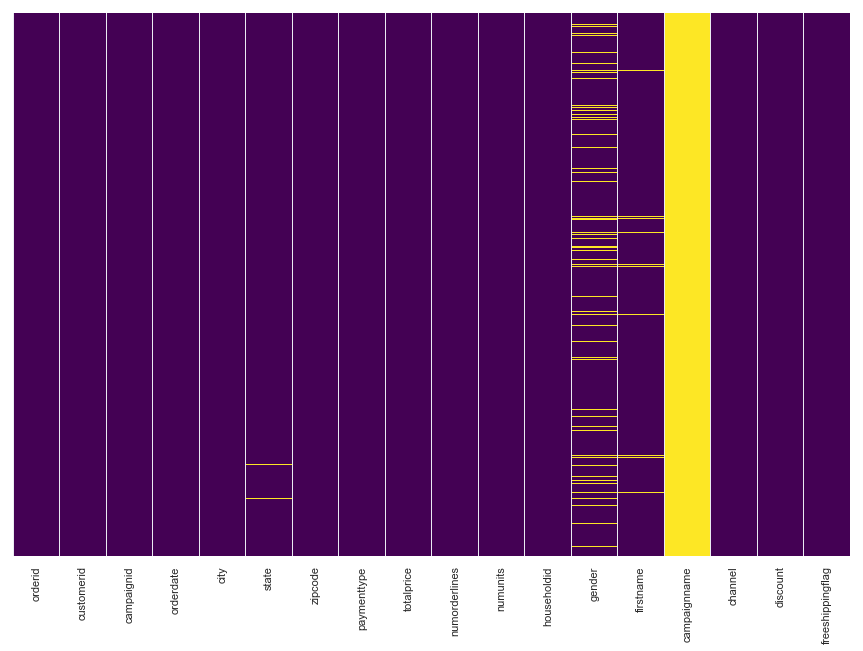

In [120]:
sns.heatmap(data=ordersCustomerCampaign.isnull(), yticklabels=False, 
            cbar=False, cmap='viridis' )

In [121]:
def wyborstanudoanalizy(dane, stan):
    wybrany_stan = dane.loc[dane.state_right == stan]
    return wybrany_stan

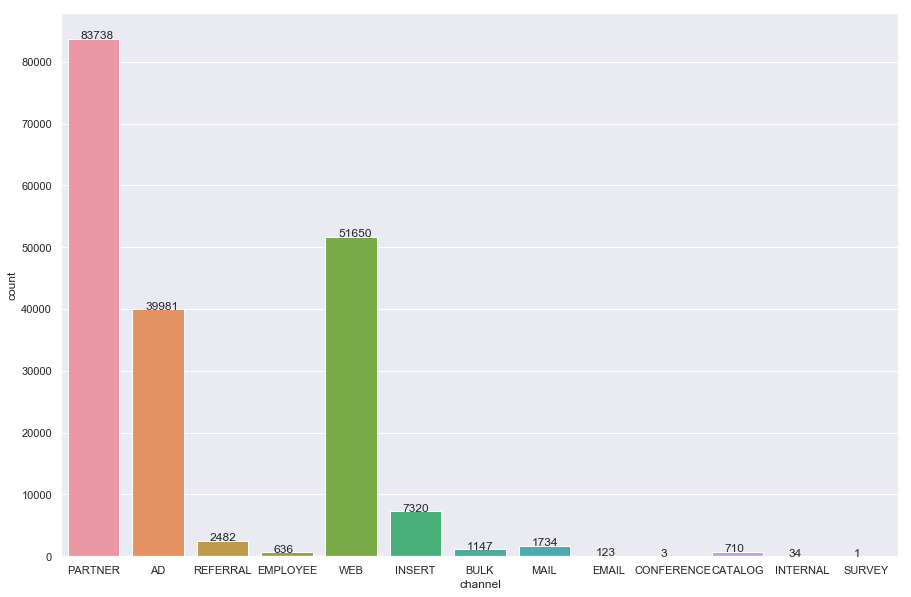

In [122]:
#Sprawdzamy jakie kanały sprzedaży były w tym stanie najpopularniejsze
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.countplot(x="channel", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()))
plt.show()

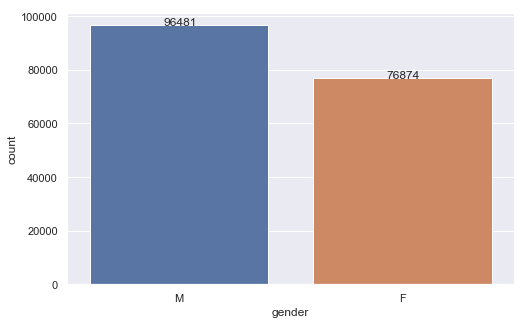

In [123]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(x="gender", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()))
plt.show()

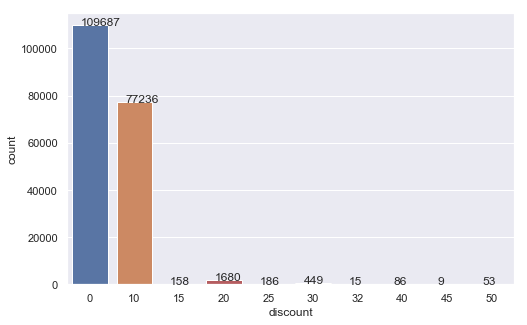

In [124]:
ax = sns.countplot(x="discount", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()))
plt.show()

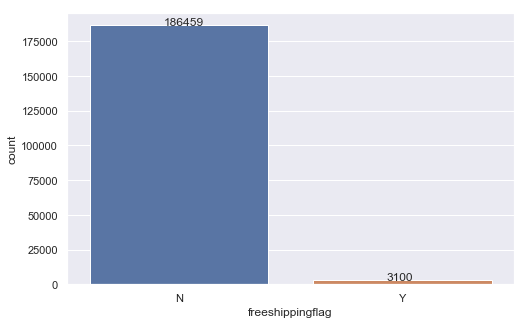

In [127]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(x="freeshippingflag", data=ordersCustomerCampaign)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()))
plt.show()

In [155]:
dane = pd.DataFrame(ordersCustomerCampaign, columns=['gender', 'discount','freeshippingflag','totalprice','numunits'])
dane.head()


,gender,discount,freeshippingflag,totalprice,numunits
0,M,10,N,190.00,3
1,NaN,10,N,35.22,2
2,NaN,10,N,10.00,1
3,F,10,N,10.00,1
4,F,10,N,17.50,1


In [156]:

dane['numunits'] = dane['numunits'].mask(dane['numunits'] <= 1, 0)
dane['numunits'] = dane['numunits'].mask(dane['numunits'] > 1, 1)
dane

,gender,discount,freeshippingflag,totalprice,numunits
0,M,10,N,190.00,1
1,NaN,10,N,35.22,1
2,NaN,10,N,10.00,0
3,F,10,N,10.00,0
4,F,10,N,17.50,0
5,M,10,N,59.80,1
6,NaN,10,N,22.50,0
7,M,10,N,0.00,1
8,F,10,N,18.00,0
9,M,10,N,34.90,1


In [157]:
dane = pd.get_dummies(dane, columns=['gender'], drop_first=True)

dane

,discount,freeshippingflag,totalprice,numunits,gender_M
0,10,N,190.00,1,1
1,10,N,35.22,1,0
2,10,N,10.00,0,0
3,10,N,10.00,0,0
4,10,N,17.50,0,0
5,10,N,59.80,1,1
6,10,N,22.50,0,0
7,10,N,0.00,1,1
8,10,N,18.00,0,0
9,10,N,34.90,1,1


In [158]:
dane = pd.get_dummies(dane, columns=['freeshippingflag'], drop_first=True)
dane

,discount,totalprice,numunits,gender_M,freeshippingflag_Y
0,10,190.00,1,1,0
1,10,35.22,1,0,0
2,10,10.00,0,0,0
3,10,10.00,0,0,0
4,10,17.50,0,0,0
5,10,59.80,1,1,0
6,10,22.50,0,0,0
7,10,0.00,1,1,0
8,10,18.00,0,0,0
9,10,34.90,1,1,0


In [159]:
dane['discount'] = dane['discount'].mask(dane['discount'] < 10 , 0)
dane['discount'] = dane['discount'].mask(dane['discount'] >= 10 , 1)
dane

,discount,totalprice,numunits,gender_M,freeshippingflag_Y
0,1,190.00,1,1,0
1,1,35.22,1,0,0
2,1,10.00,0,0,0
3,1,10.00,0,0,0
4,1,17.50,0,0,0
5,1,59.80,1,1,0
6,1,22.50,0,0,0
7,1,0.00,1,1,0
8,1,18.00,0,0,0
9,1,34.90,1,1,0


In [160]:
dane['totalprice'] = dane['totalprice'].mask(dane['totalprice'] < 25 , 0)
dane['totalprice'] = dane['totalprice'].mask(dane['totalprice'] >= 25 , 1)
dane

,discount,totalprice,numunits,gender_M,freeshippingflag_Y
0,1,1.0,1,1,0
1,1,1.0,1,0,0
2,1,0.0,0,0,0
3,1,0.0,0,0,0
4,1,0.0,0,0,0
5,1,1.0,1,1,0
6,1,0.0,0,0,0
7,1,0.0,1,1,0
8,1,0.0,0,0,0
9,1,1.0,1,1,0


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


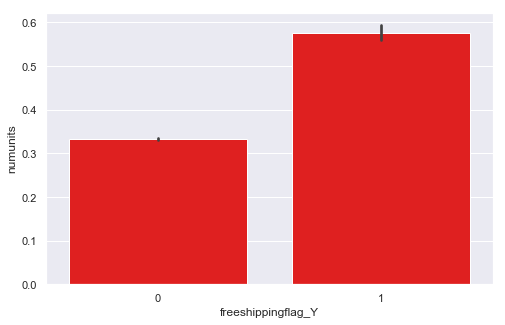

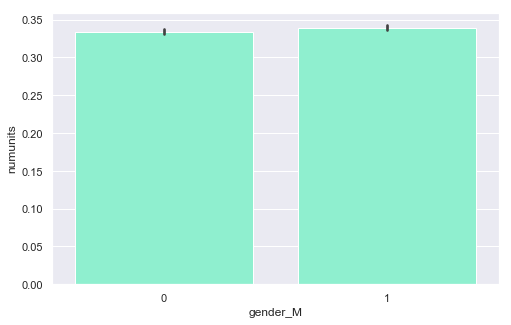

In [161]:
sns.barplot('freeshippingflag_Y', 'numunits', data=dane, color="red")
plt.show()
#Widzimy, że częściej kobiety kupują więcej sztuk towaru
sns.barplot('gender_M', 'numunits', data=dane, color="aquamarine")
plt.show()

In [166]:
train = pd.DataFrame(dane, columns=['discount','gender_M','freeshippingflag_Y','totalprice','numunits'])
train.head()



,discount,gender_M,freeshippingflag_Y,totalprice,numunits
0,1,1,0,1.0,1
1,1,0,0,1.0,1
2,1,0,0,0.0,0
3,1,0,0,0.0,0
4,1,0,0,0.0,0


In [167]:
korelacja = train.corr('pearson')
korelacja

,discount,gender_M,freeshippingflag_Y,totalprice,numunits
discount,1.000000,-0.037526,0.066782,0.020296,0.033110
gender_M,-0.037526,1.000000,-0.026693,0.024483,0.005475
freeshippingflag_Y,0.066782,-0.026693,1.000000,0.042226,0.065344
totalprice,0.020296,0.024483,0.042226,1.000000,0.346327
numunits,0.033110,0.005475,0.065344,0.346327,1.000000


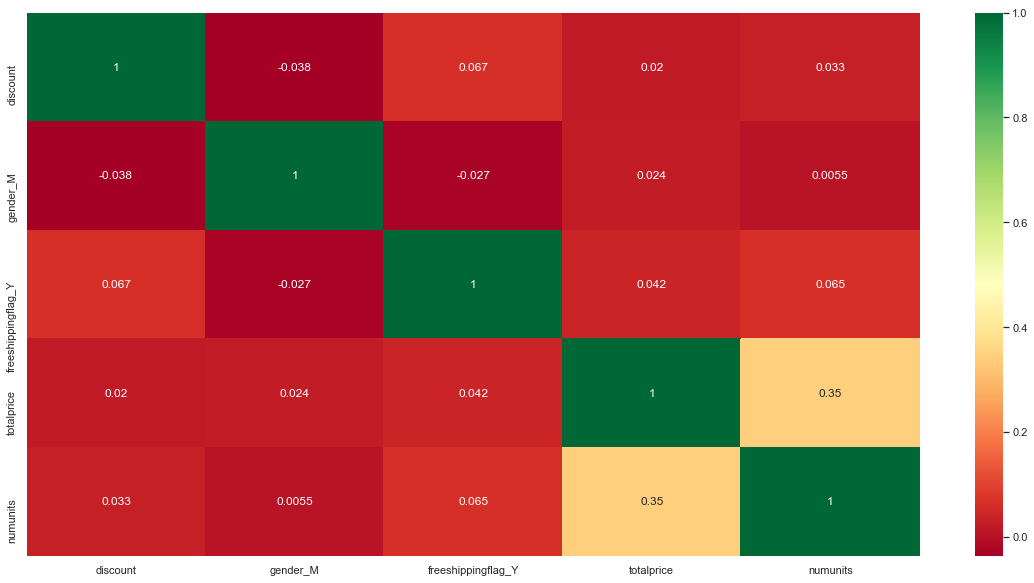

In [170]:
wybrane_tabele = ['discount','gender_M','freeshippingflag_Y','totalprice','numunits']
X = train[wybrane_tabele]

plt.subplots(figsize=(20, 10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [183]:
X = train.drop('numunits', axis = 1)
y = train['numunits']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [186]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [187]:
logR.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
predictions = logR.predict(X_test)

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     41587
           1       0.52      0.35      0.42     20968

   micro avg       0.68      0.68      0.68     62555
   macro avg       0.62      0.60      0.60     62555
weighted avg       0.65      0.68      0.66     62555



In [191]:
from sklearn.metrics import confusion_matrix

In [192]:
print(confusion_matrix(y_test, predictions))

[[34924  6663]
 [13612  7356]]


In [197]:
macierz_konfuzji = metrics.confusion_matrix(y_test, predictions)

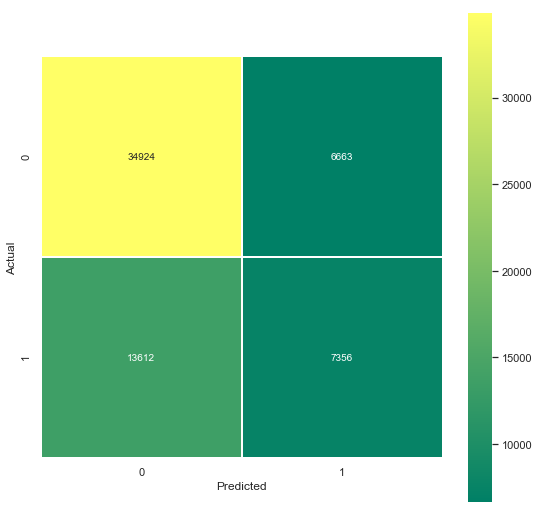

In [198]:
plt.figure(figsize=(9,9))
sns.heatmap(macierz_konfuzji, annot=True, fmt=".0f", linewidths=.9, square = True, cmap = 'summer');
plt.ylabel('Actual');
plt.xlabel('Predicted');

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.672
LogisticRegression log_loss is 0.581
LogisticRegression auc is 0.687


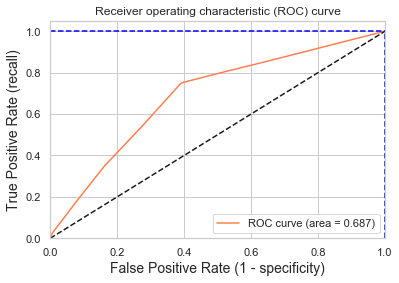

Using a threshold of 0.159 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [206]:
X = train.drop('numunits', axis = 1)
y = train['numunits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

# sprawdzenie wyników klasyfikacji 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index pierwszego progu, gdzie sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [207]:
X_train = train.drop("numunits",axis=1)
Y_train = train["numunits"]
X_test = train.drop("numunits",axis=1)
X_train.shape , Y_train.shape , X_test.shape

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
Y_pred = logmodel.predict(X_test)
acc_log = round(logmodel.score(X_train , Y_train) * 100, 2)
acc_log

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67.61